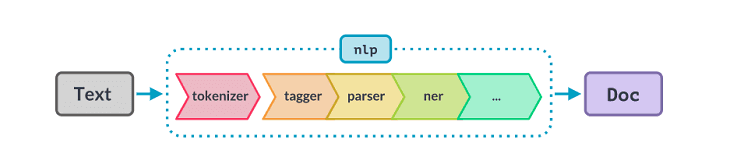

In [31]:
# Import spacy
import spacy

# Load a trained model- we are using the model for English
nlp = spacy.load("en_core_web_sm")

In [32]:
# Pass the text you want to analyze to your model
# Pass the text you want to analyze to your model
text = "Jennifer is learning quantitative analysis."
doc = nlp(text)

print(doc)  # Output: Jennifer is learning quantitative analysis.

Jennifer is learning quantitative analysis.


In [33]:
from spacy import displacy

In [34]:
## display
displacy.render(doc, style="ent",  jupyter=True)

In [35]:
# Let us check the length of both
len(text)  # Output: 43

43

In [36]:
len(doc)  # Output: 6

6

In [37]:
# Access the text of each token in the processed document
for token in doc:
    print(token.text)


Jennifer
is
learning
quantitative
analysis
.


In [38]:
token.text

'.'

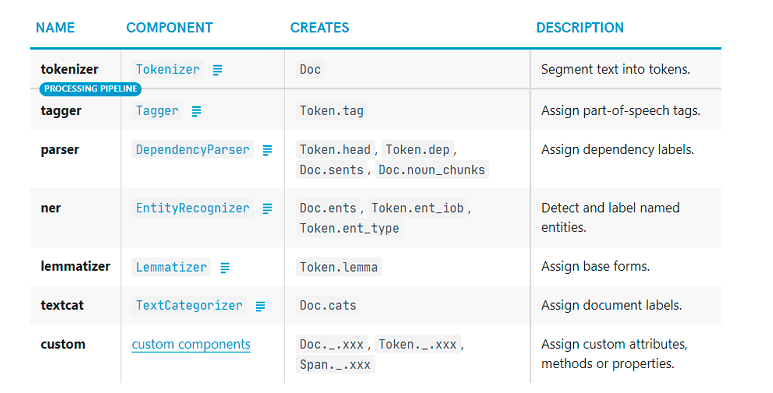

In [39]:
# Initialize the text you want to analyze
text = "I am going where Jennifer went yesterday."
# Pass the text to the model to create the doc
doc = nlp(text)
# Print the lemma for each token
for token in doc:
    print(token.text, " - ", token.lemma_)

I  -  I
am  -  be
going  -  go
where  -  where
Jennifer  -  Jennifer
went  -  go
yesterday  -  yesterday
.  -  .


In [40]:
# Initialize the text that you want to analyze
text = "Ripple was founded in 2012 by Jed McCaleb and Chris Larsen (co-founder of E-Loan). But the gears were in motion back in 2004, four years before Bitcoin, when a Canadian programmer, Ryan Fugger, developed RipplePay.RipplePay, though not based on blockchain, was a secure payment system for a financial network. In 2012, Jed McCaleb and Chris Larsen started the company OpenCoin, renamed Ripple Labs in 2013."
# Source: https://blog.quantinsti.com/ripple-xrp/

In [41]:
text

'Ripple was founded in 2012 by Jed McCaleb and Chris Larsen (co-founder of E-Loan). But the gears were in motion back in 2004, four years before Bitcoin, when a Canadian programmer, Ryan Fugger, developed RipplePay.RipplePay, though not based on blockchain, was a secure payment system for a financial network. In 2012, Jed McCaleb and Chris Larsen started the company OpenCoin, renamed Ripple Labs in 2013.'

In [42]:
## process the text
doc2 = nlp(text)

In [43]:
for token in doc2:
    print(token.text)

Ripple
was
founded
in
2012
by
Jed
McCaleb
and
Chris
Larsen
(
co
-
founder
of
E
-
Loan
)
.
But
the
gears
were
in
motion
back
in
2004
,
four
years
before
Bitcoin
,
when
a
Canadian
programmer
,
Ryan
Fugger
,
developed
RipplePay
.
RipplePay
,
though
not
based
on
blockchain
,
was
a
secure
payment
system
for
a
financial
network
.
In
2012
,
Jed
McCaleb
and
Chris
Larsen
started
the
company
OpenCoin
,
renamed
Ripple
Labs
in
2013
.


In [44]:
doc2

Ripple was founded in 2012 by Jed McCaleb and Chris Larsen (co-founder of E-Loan). But the gears were in motion back in 2004, four years before Bitcoin, when a Canadian programmer, Ryan Fugger, developed RipplePay.RipplePay, though not based on blockchain, was a secure payment system for a financial network. In 2012, Jed McCaleb and Chris Larsen started the company OpenCoin, renamed Ripple Labs in 2013.

In [45]:
# Print the lemma for each token
for token in doc2:
    print(token.text, " - ", token.lemma_)

Ripple  -  Ripple
was  -  be
founded  -  found
in  -  in
2012  -  2012
by  -  by
Jed  -  Jed
McCaleb  -  McCaleb
and  -  and
Chris  -  Chris
Larsen  -  Larsen
(  -  (
co  -  co
-  -  -
founder  -  founder
of  -  of
E  -  E
-  -  -
Loan  -  Loan
)  -  )
.  -  .
But  -  but
the  -  the
gears  -  gear
were  -  be
in  -  in
motion  -  motion
back  -  back
in  -  in
2004  -  2004
,  -  ,
four  -  four
years  -  year
before  -  before
Bitcoin  -  Bitcoin
,  -  ,
when  -  when
a  -  a
Canadian  -  canadian
programmer  -  programmer
,  -  ,
Ryan  -  Ryan
Fugger  -  Fugger
,  -  ,
developed  -  develop
RipplePay  -  RipplePay
.  -  .
RipplePay  -  RipplePay
,  -  ,
though  -  though
not  -  not
based  -  base
on  -  on
blockchain  -  blockchain
,  -  ,
was  -  be
a  -  a
secure  -  secure
payment  -  payment
system  -  system
for  -  for
a  -  a
financial  -  financial
network  -  network
.  -  .
In  -  in
2012  -  2012
,  -  ,
Jed  -  Jed
McCaleb  -  McCaleb
and  -  and
Chris  -  Chris
Larsen 

In [46]:
token_without_punc = [token for token in doc if not token.is_punct]
token_without_punc

[I, am, going, where, Jennifer, went, yesterday]

In [47]:
# Get the stop words: 1st method
all_stopwords = nlp.Defaults.stop_words

len(all_stopwords) # Output: 326

326

In [48]:
type(all_stopwords)

set

In [49]:
# Get the stop words: 2nd method
from spacy.lang.en.stop_words import STOP_WORDS

len(STOP_WORDS) # Output: 326

326

In [50]:
type(STOP_WORDS)

set

In [51]:
# Both are the same
all_stopwords is STOP_WORDS

True

In [52]:
# Remove the stop words
token_without_stop = [
    token for token in token_without_punc if not token.is_stop]
token_without_stop

[going, Jennifer, went, yesterday]

In [53]:
import pandas as pd

token_pos = []
for token in token_without_punc:
    token_pos.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
                      token.shape_, token.is_alpha, token.is_stop])
df = pd.DataFrame(token_pos, columns=['Text', 'Lemma', 'POS', 'Tag',
                  'Syntactic dependency relation', 'Shape', 'Is Alphabet', 'Is stop word'])
df

,Text,Lemma,POS,Tag,Syntactic dependency relation,Shape,Is Alphabet,Is stop word
0,I,I,PRON,PRP,nsubj,X,True,True
1,am,be,AUX,VBP,aux,xx,True,True
2,going,go,VERB,VBG,ROOT,xxxx,True,False
3,where,where,SCONJ,WRB,advmod,xxxx,True,True
4,Jennifer,Jennifer,PROPN,NNP,nsubj,Xxxxx,True,False
5,went,go,VERB,VBD,ccomp,xxxx,True,False
6,yesterday,yesterday,NOUN,NN,npadvmod,xxxx,True,False


In [54]:
ner = []
for ent in doc.ents:
    ner.append([ent.text, ent.start_char, ent.end_char, ent.label_])

df_ner = pd.DataFrame(
    ner, columns=['Text', 'Start character', 'End character', 'Label'])
df_ner

,Text,Start character,End character,Label
0,Jennifer,17,25,PERSON
1,yesterday,31,40,DATE


In [55]:
from spacy import displacy

In [56]:

displacy.render(doc, style="ent", jupyter=True, options={'distance': 90})

In [57]:
# Pass the text you want to analyze to your model
doc = nlp("Jennifer is learning quantitative analysis.")

# Print the part-of-speech and the syntactic dependency relation for the tokens
for token in doc:
    print(token.text, token.pos_, token.dep_)

Jennifer PROPN nsubj
is AUX aux
learning VERB ROOT
quantitative ADJ amod
analysis NOUN dobj
. PUNCT punct


In [58]:
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True, options={'distance': 90})